### Import Libraries 

In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import scipy.stats as sst
import seaborn as sns
import statsmodels.api as sm
from pandas_datareader.famafrench import get_available_datasets

### Import ETF data from Yahoo Finance

#### - SPY = SPDR S&P 500 ETF (United States)

#### - IEUR = iShares Core MSCI Europe ETF (Europe)

#### - AIA =  iShares Asia 50 ETF (Asia)

In [2]:
tickers = ['SPY', 'IEUR', 'AIA']

ETFs = pd.DataFrame()

for t in tickers:
    ETFs[t] = pdr.DataReader(t, data_source = 'yahoo', start = '2014-1-1', end = '2021-12-31')['Adj Close']

In [3]:
ETFs_return = ETFs/ETFs.shift(1) - 1
ETFs_return = ETFs_return.dropna()
ETFs_return.head()

,SPY,IEUR,AIA
Date,,,
2014-06-13,0.003048,-0.000801,0.002689
2014-06-16,0.000824,-0.004809,-0.002269
2014-06-17,0.002779,0.000000,0.001447
2014-06-18,0.007340,0.015301,0.005781
2014-06-19,0.001121,0.001547,-0.005131


### Descriptive Statistics And Graphs

In [4]:
ETFs_return.describe()

,SPY,IEUR,AIA
count,1903.000000,1903.000000,1903.000000
mean,0.000608,0.000260,0.000412
std,0.010890,0.011633,0.012973
min,-0.109424,-0.116541,-0.098266
25%,-0.003117,-0.004591,-0.006628
50%,0.000659,0.000632,0.000851
75%,0.005372,0.006050,0.007914
max,0.090603,0.091052,0.069101


In [5]:
ETFs_return.mean()*250

SPY     0.151952
IEUR    0.064894
AIA     0.102876
dtype: float64

### Figure 1

<AxesSubplot:xlabel='Date'>

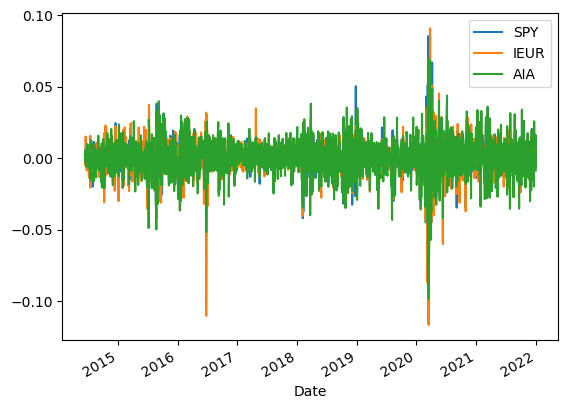

In [6]:
ETFs_return.plot()

### Figure 2

<AxesSubplot:ylabel='Density'>

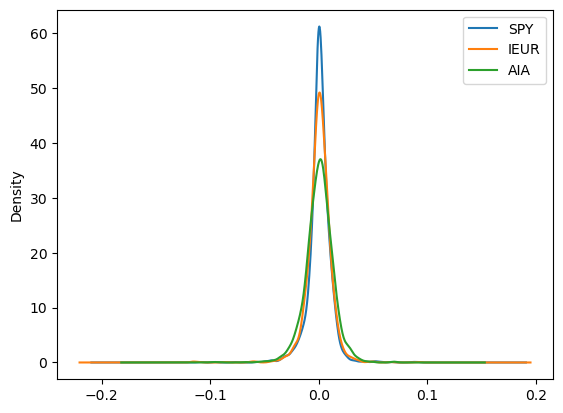

In [7]:
ETFs_return.plot(kind = 'kde')

In [8]:
ETFs_return.std()

SPY     0.010890
IEUR    0.011633
AIA     0.012973
dtype: float64

### Correlation 

In [9]:
corr_matrix = ETFs_return.corr()
corr_matrix

,SPY,IEUR,AIA
SPY,1.000000,0.837054,0.720150
IEUR,0.837054,1.000000,0.726406
AIA,0.720150,0.726406,1.000000


<AxesSubplot:>

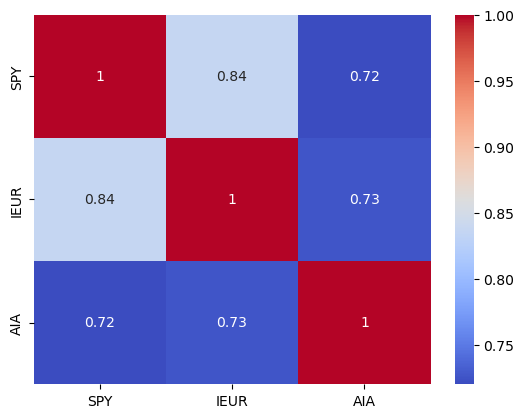

In [10]:
corr = ETFs_return.corr()

sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, annot = True, cmap = "coolwarm")

In [11]:
sst.pearsonr(ETFs_return['SPY'], ETFs_return['IEUR'])

PearsonRResult(statistic=0.8370540374576709, pvalue=0.0)

In [12]:
sst.pearsonr(ETFs_return['SPY'], ETFs_return['AIA'])

PearsonRResult(statistic=0.7201500887638934, pvalue=4.101502185189131e-304)

### Portfolio

### Hypothesis Test (Return):  H0: u1 = u2     Ha: u1 ≠ u2

In [13]:
weights1 = np.array([0.33,0.33,0.33])

port_ret1 = np.dot(ETFs_return, weights1)
port_ret1 = port_ret1[~np.isnan(port_ret1)]
port_ret1

array([ 0.00162889, -0.00206369,  0.00139473, ..., -0.00069854,
        0.00320234, -0.00383662])

In [14]:
weights2 = np.array([0.21,0.43,0.37])

port_ret2 = np.dot(ETFs_return, weights2)
port_ret2 = port_ret2[~np.isnan(port_ret2)]
port_ret2

array([ 0.00129053, -0.00273421,  0.00111909, ..., -0.00088517,
        0.00379358, -0.00393968])

In [15]:
sst.ttest_ind(a = port_ret1, b = port_ret2, equal_var = False)

Ttest_indResult(statistic=0.08625465146952367, pvalue=0.9312685316362016)

### Hypothesis Test (Risk):  H0: u1 = u2     Ha: u1 ≠ u2

In [16]:
F_stat = max(port_ret1.var()/port_ret2.var(),
             port_ret2.var()/port_ret1.var())
F_stat

1.0697151967464742

In [17]:
sst.f.ppf(0.95, dfn = 1902, dfd = 1902)

1.0783695556722634

In [18]:
p_value1 = 1 - sst.f.cdf(F_stat, dfn = 1902, dfd = 1902)
p_value1

0.07088589476278484

### Economic Significance

### Return:

In [19]:
a = float((ETFs_return['SPY'][1902] - ETFs_return['SPY'][0]) / ETFs_return['SPY'][0] * 100)
b = float((ETFs_return['IEUR'][1902] - ETFs_return['IEUR'][0]) / ETFs_return['IEUR'][0] * 100)
c = float((ETFs_return['AIA'][1902] - ETFs_return['AIA'][0]) / ETFs_return['AIA'][0] * 100)

In [20]:
df = {'ETF':['SPY', 'IEUR', 'AIA'], 'Cumulative_Return':[a, b, c]}
pd.DataFrame(df)

,ETF,Cumulative_Return
0,SPY,-182.670953
1,IEUR,-14.197029
2,AIA,-413.116108


### Risk:

In [21]:
Sr = (ETFs_return.mean()*250 - 0.03)/ (ETFs_return.std()*(250**0.5))
Sr

SPY     0.708261
IEUR    0.189717
AIA     0.355279
dtype: float64

### Portfolio Return and Risks:

In [22]:
port1 = np.array([0.33,0.33,0.33]) #Equal weight
port2 = np.array([0.21,0.43,0.37]) #Diversified

In [23]:
def port_rr(port):
    return np.dot(ETFs_return,port)

df = pd.DataFrame({'Portfolio':['1','2'],'Mean Return':[port_rr(port1).mean()*250, port_rr(port2).mean()*250], 
                   'Standard Deviation':[(port_rr(port1).var()*250)**0.5, (port_rr(port2).var()*250)**0.5]}, 
                  index=['1','2'])
df = df.set_index('Portfolio')
pd.DataFrame(df)

,Mean Return,Standard Deviation
Portfolio,,
1,0.105508,0.169593
2,0.097878,0.175405


In [24]:
def port_sr(port):
    return np.dot(ETFs_return,port)

df = pd.DataFrame({'Portfolio':['1','2'],'Sharpe Ratio':[(port_rr(port1).mean()*250 - 0.03)/(port_rr(port1).std()*(250**0.5)), 
                  (port_rr(port2).mean()*250 - 0.03)/ (port_rr(port2).std()*(250**0.5))]},
                  index=['1','2'])
df = df.set_index('Portfolio')
pd.DataFrame(df)

,Sharpe Ratio
Portfolio,
1,0.445231
2,0.386981


### CAPM Model

In [25]:
tickers1 = ['SPY', 'IEUR', 'AIA', '^IRX']

etfs = pd.DataFrame()

for t in tickers1:
    etfs[t] = pdr.DataReader(t, data_source = 'yahoo', start = '2014-1-1', end = '2021-12-31')['Adj Close']

In [26]:
etfs_returns = (etfs/etfs.shift(1))-1
etfs_returns['^IRX'] = etfs['^IRX']/(100*250)
etfs_returns = etfs_returns.dropna(axis = 0, how = 'any')
etfs_returns.head()

,SPY,IEUR,AIA,^IRX
Date,,,,
2014-06-13,0.003049,-0.000801,0.002689,1.200000e-06
2014-06-16,0.000824,-0.004809,-0.002269,1.000000e-06
2014-06-17,0.002779,0.000000,0.001447,1.320000e-06
2014-06-18,0.007340,0.015301,0.005780,7.200000e-07
2014-06-19,0.001121,0.001547,-0.005132,4.000000e-07


In [27]:
X1 = sm.add_constant(etfs_returns['SPY'] - etfs_returns['^IRX'])
X1

,const,0
Date,,
2014-06-13,1.0,0.003048
2014-06-16,1.0,0.000823
2014-06-17,1.0,0.002778
2014-06-18,1.0,0.007339
2014-06-19,1.0,0.001120
...,...,...
2021-12-27,1.0,0.014150
2021-12-28,1.0,-0.000819
2021-12-29,1.0,0.001277


### IEUR Regression

In [28]:
reg1 = sm.OLS(etfs_returns['IEUR']- etfs_returns['^IRX'], X1).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     4448.
Date:                Wed, 09 Nov 2022   Prob (F-statistic):               0.00
Time:                        22:19:53   Log-Likelihood:                 6916.2
No. Observations:                1901   AIC:                        -1.383e+04
Df Residuals:                    1899   BIC:                        -1.382e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.000     -1.927      0.054      -0.001    5.06e-06
0              0.8941      0.013     66.693      0.000       0.868       0.920
==============================================================================
Omnibus:                      611.720   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13960.123
Skew:                          -0.966   Prob(JB):                         0.00
Kurtosis:                      16.134   Cond. No.                         91.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### AIA Regression

In [29]:
reg2 = sm.OLS(etfs_returns['AIA'] - etfs_returns['^IRX'], X1).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     2046.
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          8.63e-304
Time:                        22:19:53   Log-Likelihood:                 6256.9
No. Observations:                1901   AIC:                        -1.251e+04
Df Residuals:                    1899   BIC:                        -1.250e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.000     -0.542      0.588      -0.001       0.000
0              0.8578      0.019     45.231      0.000       0.821       0.895
==============================================================================
Omnibus:                      102.770   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              369.360
Skew:                           0.112   Prob(JB):                     6.23e-81
Kurtosis:                       5.148   Cond. No.                         91.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 4 Factor Model

In [30]:
ff = pdr.DataReader('F-F_Research_Data_Factors_daily','famafrench', start = '2014-6-13', end = '2021-12-31')[0]
mm = pdr.DataReader('F-F_Momentum_Factor_daily','famafrench', start = '2014-6-13', end = '2021-12-31')[0]
mm.columns=['Mom']
factors = pd.merge(ff,mm,left_index=True,right_index=True)

In [31]:
all = pd.merge(ETFs_return,factors,left_index=True,right_index=True)
all = all.dropna(axis = 0, how = 'any')
all.head()

,SPY,IEUR,AIA,Mkt-RF,SMB,HML,RF,Mom
Date,,,,,,,,
2014-06-13,0.003048,-0.000801,0.002689,0.31,-0.06,-0.18,0.0,-0.08
2014-06-16,0.000824,-0.004809,-0.002269,0.13,0.47,-0.69,0.0,0.10
2014-06-17,0.002779,0.000000,0.001447,0.34,0.54,0.46,0.0,-0.06
2014-06-18,0.007340,0.015301,0.005781,0.75,-0.26,-0.09,0.0,0.09
2014-06-19,0.001121,0.001547,-0.005131,0.12,-0.15,-0.04,0.0,0.11


In [32]:
sec_beta = pd.DataFrame(np.nan,index=tickers,columns=['const','Mkt-RF','SMB','HML','Mom'])
sec_beta

,const,Mkt-RF,SMB,HML,Mom
SPY,NaN,NaN,NaN,NaN,NaN
IEUR,NaN,NaN,NaN,NaN,NaN
AIA,NaN,NaN,NaN,NaN,NaN


In [33]:
for t in tickers:
    X = all[['Mkt-RF','SMB','HML','Mom']]
    X1 = sm.add_constant(X)
    Y = all[t] - all['RF']
    reg = sm.OLS(Y,X1).fit()
    sec_beta.loc[t,:]=reg.params
sec_beta

,const,Mkt-RF,SMB,HML,Mom
SPY,-0.002768,0.009781,-0.001192,0.000265,-0.000113
IEUR,-0.003022,0.008603,0.000109,0.001404,-0.000588
AIA,-0.002910,0.008476,0.000406,-0.000974,-0.000491


### Portfolio Sort

#### Sort trading days according to trading volumes of all ETFs and examines their return differences between high volume days and low volume days

#### Separated into quintiles, with 0 being the lowest trading volume, and 4 being the highest

### SPY Portfolio Sort

In [34]:
SPY = pdr.DataReader('SPY',data_source='yahoo',start = '2014-1-1', end = '2021-12-31')[['Adj Close','Volume']]

In [35]:
SPY['return'] = SPY['Adj Close']/SPY['Adj Close'].shift(1)-1
SPY = SPY.dropna(axis=0, how='any')
SPY.head()

,Adj Close,Volume,return
Date,,,
2014-01-03,155.675690,81390600.0,-0.000164
2014-01-06,155.224533,108028200.0,-0.002898
2014-01-07,156.177887,86144200.0,0.006142
2014-01-08,156.211899,96582300.0,0.000218
2014-01-09,156.314041,90683400.0,0.000654


In [36]:
SPY['rank']=pd.DataFrame(pd.qcut(SPY['Volume'],5,labels=False))
SPY.head()

,Adj Close,Volume,return,rank
Date,,,,
2014-01-03,155.675690,81390600.0,-0.000164,2
2014-01-06,155.224533,108028200.0,-0.002898,3
2014-01-07,156.177887,86144200.0,0.006142,2
2014-01-08,156.211899,96582300.0,0.000218,3
2014-01-09,156.314041,90683400.0,0.000654,3


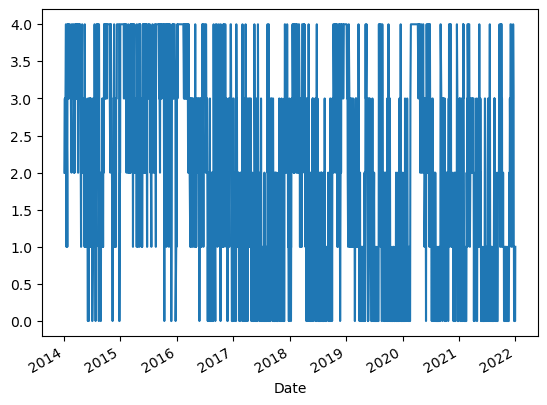

In [37]:
SPY['rank'].plot()
plt.show()

In [38]:
port=pd.DataFrame()
for rank in [0,1,2,3,4]:
    print(rank)
    temp=SPY['return'][SPY['rank']==rank]
    temp=temp.reset_index(drop=True)
    port=port.reset_index(drop=True)
    port=pd.concat([port,temp],axis=1,ignore_index=True)
port=port.dropna(axis=0, how='any')

0
1
2
3
4


In [39]:
port.head()

,0,1,2,3,4
0,0.002023,-0.001300,-0.000164,-0.002898,-0.013305
1,0.000102,0.000652,0.006142,0.000218,-0.008193
2,0.001015,0.003487,0.002941,0.000654,-0.021336
3,0.004918,0.000896,0.001195,0.002723,-0.004919
4,0.000050,-0.004738,0.000906,0.010898,-0.009605


In [40]:
for i in [0,1,2,3,4]:
    print(i)
    print(port.loc[:,i].mean())
    print(sst.ttest_1samp(a=port.loc[:,i],popmean=0))    

0
0.0017880882953892792
Ttest_1sampResult(statistic=9.60453933265925, pvalue=8.522768316069556e-20)
1
0.002001809823366763
Ttest_1sampResult(statistic=7.44654033260946, pvalue=5.919581634808036e-13)
2
0.0013503484481432622
Ttest_1sampResult(statistic=4.478853036954054, pvalue=9.799019360559014e-06)
3
0.0012175876431866914
Ttest_1sampResult(statistic=2.7731368898028017, pvalue=0.005810992700119614)
4
-0.003256593852263785
Ttest_1sampResult(statistic=-3.2704779890570963, pvalue=0.0011664544197653522)


In [41]:
sst.ttest_rel(a=port.loc[:,4],b=port.loc[:,0])

Ttest_relResult(statistic=-4.880912059856165, pvalue=1.5269316325394822e-06)

### IEUR Portfolio Sort

In [42]:
IEUR = pdr.DataReader('IEUR',data_source='yahoo',start = '2014-1-1', end = '2021-12-31')[['Adj Close','Volume']]

In [43]:
IEUR['return'] = IEUR['Adj Close']/IEUR['Adj Close'].shift(1)-1
IEUR = IEUR.dropna(axis=0, how='any')
IEUR.head()

,Adj Close,Volume,return
Date,,,
2014-06-13,39.513943,2600.0,-0.000801
2014-06-16,39.323936,1000.0,-0.004809
2014-06-17,39.323936,1500.0,0.000000
2014-06-18,39.925632,25700.0,0.015301
2014-06-19,39.987381,14700.0,0.001547


In [44]:
IEUR['rank']=pd.DataFrame(pd.qcut(IEUR['Volume'],5,labels=False))
IEUR.head()

,Adj Close,Volume,return,rank
Date,,,,
2014-06-13,39.513943,2600.0,-0.000801,0
2014-06-16,39.323936,1000.0,-0.004809,0
2014-06-17,39.323936,1500.0,0.000000,0
2014-06-18,39.925632,25700.0,0.015301,0
2014-06-19,39.987381,14700.0,0.001547,0


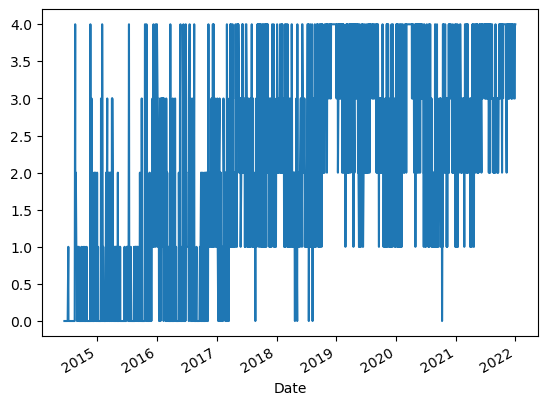

In [45]:
IEUR['rank'].plot()
plt.show()

In [46]:
port=pd.DataFrame()
for rank in [0,1,2,3,4]:
    print(rank)
    temp=IEUR['return'][IEUR['rank']==rank]
    temp=temp.reset_index(drop=True)
    port=port.reset_index(drop=True)
    port=pd.concat([port,temp],axis=1,ignore_index=True)
port=port.dropna(axis=0, how='any')

0
1
2
3
4


In [47]:
port.head()

,0,1,2,3,4
0,-0.000801,-0.011704,-0.003564,0.001951,0.009968
1,-0.004809,0.001680,-0.008157,-0.004976,0.000220
2,0.000000,0.005891,-0.022646,-0.000643,-0.011009
3,0.015301,0.011177,-0.000564,-0.016220,0.003899
4,0.001547,0.002085,-0.004746,0.009479,-0.004744


In [48]:
for i in [0,1,2,3,4]:
    print(i)
    print(port.loc[:,i].mean())
    print(sst.ttest_1samp(a=port.loc[:,i],popmean=0))    

0
0.0003267872466001953
Ttest_1sampResult(statistic=0.6717165837068964, pvalue=0.5021733709083605)
1
0.0005157743549821097
Ttest_1sampResult(statistic=1.146691118977113, pvalue=0.2522327147318844)
2
0.0004280041741457627
Ttest_1sampResult(statistic=0.8807133850777591, pvalue=0.37903110864695155)
3
0.00035538872540150936
Ttest_1sampResult(statistic=0.737193193558651, pvalue=0.4614609930159199)
4
-0.0003531630155770793
Ttest_1sampResult(statistic=-0.3770008347664035, pvalue=0.706383980638063)


In [49]:
sst.ttest_rel(a=port.loc[:,4],b=port.loc[:,0])

Ttest_relResult(statistic=-0.6625026664471803, pvalue=0.5080517925136887)

In [50]:
### AIA Portfolio Sort

In [51]:
AIA = pdr.DataReader('AIA',data_source='yahoo',start = '2014-1-1', end = '2021-12-31')[['Adj Close','Volume']]

In [52]:
AIA['return'] = AIA['Adj Close']/AIA['Adj Close'].shift(1)-1
AIA = AIA.dropna(axis=0, how='any')
AIA.head()

,Adj Close,Volume,return
Date,,,
2014-01-03,38.950314,32900.0,-0.007735
2014-01-06,38.638241,49500.0,-0.008012
2014-01-07,38.705719,31800.0,0.001746
2014-01-08,38.806931,7000.0,0.002615
2014-01-09,38.503300,19400.0,-0.007824


In [53]:
AIA['rank']=pd.DataFrame(pd.qcut(AIA['Volume'],5,labels=False))
AIA.head()

,Adj Close,Volume,return,rank
Date,,,,
2014-01-03,38.950314,32900.0,-0.007735,1
2014-01-06,38.638241,49500.0,-0.008012,2
2014-01-07,38.705719,31800.0,0.001746,1
2014-01-08,38.806931,7000.0,0.002615,0
2014-01-09,38.503300,19400.0,-0.007824,1


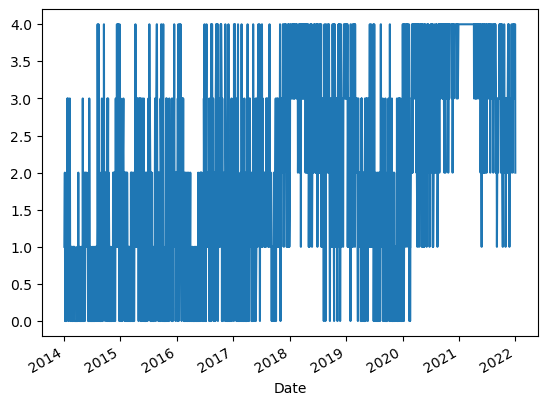

In [54]:
AIA['rank'].plot()
plt.show()

In [55]:
port.head()

,0,1,2,3,4
0,-0.000801,-0.011704,-0.003564,0.001951,0.009968
1,-0.004809,0.001680,-0.008157,-0.004976,0.000220
2,0.000000,0.005891,-0.022646,-0.000643,-0.011009
3,0.015301,0.011177,-0.000564,-0.016220,0.003899
4,0.001547,0.002085,-0.004746,0.009479,-0.004744


In [56]:
port=pd.DataFrame()
for rank in [0,1,2,3,4]:
    print(rank)
    temp=AIA['return'][AIA['rank']==rank]
    temp=temp.reset_index(drop=True)
    port=port.reset_index(drop=True)
    port=pd.concat([port,temp],axis=1,ignore_index=True)
port=port.dropna(axis=0, how='any')

0
1
2
3
4


In [57]:
for i in [0,1,2,3,4]:
    print(i)
    print(port.loc[:,i].mean())
    print(sst.ttest_1samp(a=port.loc[:,i],popmean=0))   

0
0.00048305225614336757
Ttest_1sampResult(statistic=1.1514818339350241, pvalue=0.25022014949922744)
1
0.0007955098187687095
Ttest_1sampResult(statistic=1.5820068791619408, pvalue=0.11443636750266127)
2
0.0012630731005377402
Ttest_1sampResult(statistic=2.252657949676726, pvalue=0.024820711594454294)
3
-0.00011367838779344896
Ttest_1sampResult(statistic=-0.16109066846457662, pvalue=0.8721031155555299)
4
-0.00036147103548569114
Ttest_1sampResult(statistic=-0.4079514018110983, pvalue=0.6835270783753783)


In [58]:
sst.ttest_rel(a=port.loc[:,4],b=port.loc[:,0])

Ttest_relResult(statistic=-0.88955072805305, pvalue=0.374240505085756)

### Limitations

### Kurtosis:

In [59]:
ETFs_return.kurtosis()

SPY     17.568119
IEUR    19.906450
AIA      4.857871
dtype: float64